In [128]:
### Suite à un problème avec le logiciel PyCharm, les Markdown seront gérés en Code commentés
# https://youtrack.jetbrains.com/issue/PY-26560/Jupyter-notebook-markdown-disappears

In [129]:
# Sommaire
# 1. Importation des librairies et du fichiers
# 2. Découverte du dataframe principal df
# 3. Découverte du dataframe df_region
# 4. Data Cleaning
# 5. EDA

In [130]:
# ----------------------------------------------------
#
# 1. Importation des librairies et du fichiers
#
# ----------------------------------------------------

In [131]:
# Importation des packages

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [132]:
# Importation du fichier

df = pd.read_csv(
    "https://raw.githubusercontent.com/YoannB-data/gamezone_shop/master/data/gamezone-orders-data.csv"
)
df_region = pd.read_csv(
    "https://raw.githubusercontent.com/YoannB-data/gamezone_shop/master/data/gamezone-region.csv"
)

display(df)
display(df_region)

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE;
0,2c06175e,0001328c3c220830,44189,44178,Nintendo Switch,e682,168.00,website,affiliate,unknown,US;
1,ee8e5bc2,0002af7a5c6100772,44105,44095,Nintendo Switch,e682,160.61,website,direct,desktop,DE;
2,9eb4efe0,0002b8350e167074,43942,43877,Nintendo Switch,8d0d,151.20,website,direct,desktop,US;
3,cac7cbaf,0006d06b98385729,43928,43925,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU;
4,6b0230bc,00097279a2f46150,44159,44045,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR;
...,...,...,...,...,...,...,...,...,...,...,...
21859,e432cf6f,fff0b6a1e9996384,43796,43798,Sony PlayStation 5 Bundle,54ed,1527.06,website,direct,desktop,US;
21860,f4f11c04,fff4592dc6d103535,43822,43825,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US;
21861,f4f11c04,fff4592dc6d103537,43822,43825,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US;
21862,203ce4dd,fff829b061e16171,44227,44229,Dell Gaming Mouse,8d4f,67.07,mobile app,direct,desktop,GB;


,COUNTRY_CODE,REGION
0,AD,EMEA
1,AE,EMEA
2,AG,NaN
3,AI,NaN
4,AL,EMEA
...,...,...
187,VU,APAC
188,YE,EMEA
189,ZA,EMEA
190,ZM,EMEA


In [133]:
# ----------------------------------------------------
#
# 2. Découverte du dataframe principal df
#
# ----------------------------------------------------

In [134]:
display(df.shape)

(21864, 11)

In [135]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   USER_ID                  21864 non-null  object 
 1   ORDER_ID                 21864 non-null  object 
 2   PURCHASE_TS              21864 non-null  object 
 3   SHIP_TS                  21864 non-null  int64  
 4   PRODUCT_NAME             21864 non-null  object 
 5   PRODUCT_ID               21864 non-null  object 
 6   USD_PRICE                21859 non-null  float64
 7   PURCHASE_PLATFORM        21864 non-null  object 
 8   MARKETING_CHANNEL        21781 non-null  object 
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object 
 10  COUNTRY_CODE;            21864 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.8+ MB


None

In [136]:
display(df.describe())

,SHIP_TS,USD_PRICE
count,21864.000000,21859.000000
mean,43936.670005,281.406583
std,213.954778,366.296410
min,43391.000000,0.000000
25%,43781.000000,126.000000
50%,43974.000000,168.000000
75%,44110.000000,357.000000
max,44516.000000,3146.880000


In [137]:
df.isna().sum()

USER_ID                     0
ORDER_ID                    0
PURCHASE_TS                 0
SHIP_TS                     0
PRODUCT_NAME                0
PRODUCT_ID                  0
USD_PRICE                   5
PURCHASE_PLATFORM           0
MARKETING_CHANNEL          83
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE;               0
dtype: int64

In [138]:
# Le dataframe contient 21864 lignes pour 11 colonnes.
# Il y a des Nan dans USD_PRICE, MARKETING_CHANNEL et MARKETING_CHANNEL

In [139]:
print(df.duplicated().sum())

35


In [140]:
# Nous allons supprimer les duplicata dès maintenant pour éviter de polluer la suite de l'analyse
df = df.drop_duplicates()

In [141]:
# Il y a 35 duplicates

In [142]:
# Analyse colonne par colonne

for num in df.columns:
    if df[num].dtype == "object":
        print(df[num].value_counts())
    else:
        print(df[num].value_counts().sort_index())
    print("-" * 60)

USER_ID
07868dba    4
c14ee1a5    4
d1d4e5a2    4
c38632c6    4
3861590f    4
           ..
ba03bfd7    1
0228447d    1
a4d90bf8    1
c4eb31b0    1
a2eaa1d1    1
Name: count, Length: 19851, dtype: int64
------------------------------------------------------------
ORDER_ID
f343a3756c474119     2
e9372233a6056336     2
f2bff88d2085179      2
ec7e016928819702     2
f47b051bd7983108     2
                    ..
5f39d1e52cc102362    1
5f37e6411f22645      1
5f30aa8df5274448     1
5f2cd24046d7483      1
5f4ceebd9cd71885     1
Name: count, Length: 21719, dtype: int64
------------------------------------------------------------
PURCHASE_TS
44184                  95
44187                  93
44183                  86
44188                  84
44186                  80
                       ..
06-14-2019 13:62:34     1
12-31-2020 01:54:40     1
06-14-2019 13:62:39     1
12-31-2020 01:54:39     1
06-14-2019 13:62:41     1
Name: count, Length: 783, dtype: int64
-----------------------------------

In [143]:
# ORDER_ID
#   Il y a des ORDER_ID qui revienent plusieurs fois, avec des USER_ID différents

# PURCHASE_TS
#   Certaines dates sont au format '44186'
#   d'autres au format '06-14-2019 13:62:34'

# PRODUCT_NAME
#   On a '27in 4K gaming monitor'
#   et '27inches 4k gaming monitor'

# USD_PRICE
#   On a des montants à 0 et des Nan, à uniformiser en Nan

# MARKETING_CHANNEL
#   On a des 'unknown' et des Nan, à uniformiser en Nan

# ACCOUNT_CREATION_METHOD
#   On a des 'unknown' et des Nan, à uniformiser en Nan

# COUNTRY_CODE
#   La colonne est rempli de ';'
#   Il y a également des valeurs vide et pas Nan, à uniformiser en Nan

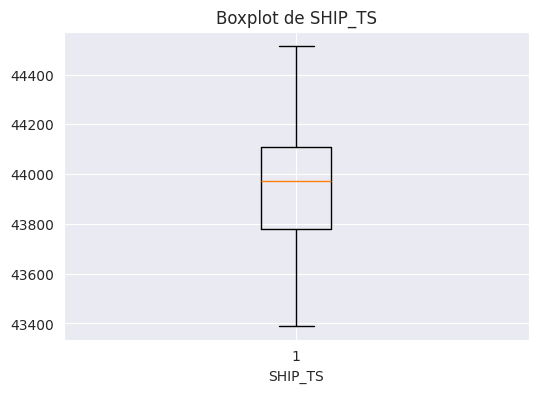

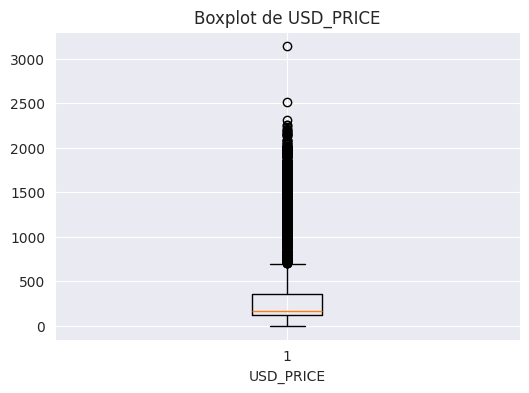

In [144]:
# Recherche d'outliers

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

In [195]:
# Analyse de la valeur maximal

# On sort le nom du produit
product_max = df.loc[df["USD_PRICE"] == df["USD_PRICE"].max()]["PRODUCT_NAME"].values[0]

# Et on le compare aux autres ventes de ce même produit
df.loc[df["PRODUCT_NAME"] == product_max]["USD_PRICE"].describe()

# Conclusion
# Si 3100 USD semble extrêmement cher pour un article vendu en moyenne 1600 USD
# c'est tout aussi surprenant de le voir vendu à 375 USD
# Sans pouvoir avoir les éclaircissements du métier, nous allons garder cet outlier

count     977.000000
mean     1626.656960
std       299.306748
min       375.050000
25%      1515.150000
50%      1699.910000
75%      1800.000000
max      3146.880000
Name: USD_PRICE, dtype: float64

In [145]:
# ----------------------------------------------------
#
# 2. Découverte du dataframe df_region
#
# ----------------------------------------------------

In [146]:
display(df_region.shape)
display(df_region.info())
display(df_region.describe())

(192, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   COUNTRY_CODE  191 non-null    object
 1   REGION        169 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


None

,COUNTRY_CODE,REGION
count,191,169
unique,191,5
top,AD,EMEA
freq,1,98


In [147]:
# Le dataframe contient 192 lignes pour 2 colonnes.

In [148]:
print(df_region.duplicated().sum())

0


In [149]:
# Le dataframe ne contient pas de duplicate

In [150]:
# Analyse colonne par colonne

for num in df_region.columns:
    if df_region[num].dtype == "object":
        print(df_region[num].value_counts())
    else:
        print(df_region[num].value_counts().sort_index())
    print("-" * 60)

COUNTRY_CODE
AD    1
AE    1
AG    1
AI    1
AL    1
     ..
VU    1
YE    1
ZA    1
ZM    1
ZW    1
Name: count, Length: 191, dtype: int64
------------------------------------------------------------
REGION
EMEA             98
APAC             42
LATAM            22
North America     5
X.x               2
Name: count, dtype: int64
------------------------------------------------------------


In [151]:
# REGION
#   Les region sont abrégées sauf North America, à remplacer par NA
#   Certains pays n'ont pas de Region : elles sont en X.x ou Nan

In [152]:
display(df_region.loc[df_region["REGION"] == "X.x"])
display(df_region.loc[df_region["REGION"].isna()])

,COUNTRY_CODE,REGION
113,MH,X.x
141,PG,X.x


,COUNTRY_CODE,REGION
2,AG,NaN
3,AI,NaN
25,BQ,NaN
27,BS,NaN
44,CW,NaN
61,GD,NaN
67,GL,NaN
69,GP,NaN
80,IE,NaN
89,JM,NaN


In [153]:
# ----------------------------------------------------------
#
# 3. Data Cleaning
#
# ----------------------------------------------------------

In [154]:
# 1. ORDER_ID
#   Il y a des ORDER_ID qui revienent plusieurs fois, avec des USER_ID différents

In [155]:
q = """
SELECT
    ORDER_ID,
    count(USER_ID) as nb
FROM df
GROUP BY ORDER_ID
HAVING nb = 2
"""
list_id = duckdb.sql(q).df()["ORDER_ID"].tolist()

df.loc[df["ORDER_ID"].isin(list_id)]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE;
9921,e80b93ad,815caec5eb998020,43860,43861,27in 4K gaming monitor,891b,408.20,website,email,mobile,DE;
9922,e80b93ad,815caec5eb998020,43860,43861,27in 4K gaming monitor,891b,408.20,website,email,desktop,DE;
13502,3bb56d71,add88586a5827183,43852,43853,27in 4K gaming monitor,891b,484.89,website,email,mobile,GB;
13503,3bb56d71,add88586a5827183,43852,43853,27in 4K gaming monitor,891b,484.89,website,email,desktop,GB;
18909,52e2062d,e44ebe4eed936564,44237,44238,Nintendo Switch,e682,102.88,website,direct,desktop,MX;
...,...,...,...,...,...,...,...,...,...,...,...
21735,b0a2896,fecc9d6766231653,44249,44252,Nintendo Switch,8d0d,184.90,website,direct,desktop,GB;
21742,e69c1f1e,fede5c24b0797422,44250,44252,Nintendo Switch,8d0d,142.80,website,direct,desktop,US;
21743,9c12903,fede5c24b0797422,44250,44252,Nintendo Switch,8d0d,142.80,website,direct,desktop,US;
21751,ebf6f56d,fef061c2a1499684,44233,44236,Nintendo Switch,e682,164.42,website,direct,desktop,ES;


In [156]:
# Les raisons de ces "doublons" d'ORDER_ID peuvent provenir d'une anomalie du USER_ID ou de l'ACCOUNT_CREATION_METHOD
# Nous allons laisser la donnée en l'état ne sachant pas comment y remédier

In [157]:
# 2. PURCHASE_TS
#   Certaines dates sont au format '44186'
#   d'autres au format '06-14-2019 13:62:34'

In [158]:
def convert_mixed_dates(date_value: str) -> datetime | None:
    if pd.isna(date_value):
        return None

    date_str = str(date_value).strip()
    # Si c'est un nombre (format Excel)
    if date_str.isdigit():
        # Convertir le numéro de série Excel en date
        excel_date = int(date_str)
        # Excel compte depuis le 1er janvier 1900, mais il y a une erreur de 2 jours dans Excel
        base_date = datetime(1899, 12, 30)  # Correction de l'erreur Excel
        converted_date = base_date + timedelta(days=excel_date)
        return converted_date.strftime("%d/%m/%Y")

    # Si c'est un format datetime
    else:
        try:
            # Corriger les secondes invalides (62 -> 59 par exemple)
            if "13:62:34" in date_str:
                date_str = date_str.replace("13:62:34", "13:59:34")
            # Vous pouvez ajouter d'autres corrections si nécessaire

            # Parser le format MM-DD-YYYY HH:MM:SS
            parsed_date = pd.to_datetime(date_str, format="%m-%d-%Y %H:%M:%S")
            return parsed_date.strftime("%d/%m/%Y")
        except:
            try:
                # Essayer d'autres formats si le premier échoue
                parsed_date = pd.to_datetime(date_str, errors="coerce")
                if not pd.isna(parsed_date):
                    return parsed_date.strftime("%d/%m/%Y")
            except:
                pass

    return None


# Appliquer la conversion
df["PURCHASE_TS"] = df["PURCHASE_TS"].apply(convert_mixed_dates)
df["SHIP_TS"] = df["SHIP_TS"].apply(convert_mixed_dates)

In [159]:
df.loc[df["PURCHASE_TS"].isna()]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE;
1047,a5298a4d,0dda212aaea69940,None,08/07/2019,JBL Quantum 100 Gaming Headset,ab0f,21.96,website,direct,desktop,FR;
5846,a81bb521,4cd9ab100d971208,None,11/01/2021,Nintendo Switch,8d0d,120.26,website,direct,desktop,IE;
11853,2fa9f33d,99d824517da22388,None,11/04/2019,JBL Quantum 100 Gaming Headset,ab0f,21.19,website,direct,mobile,JP;
20725,67f8050b,f4de38506b644875,None,17/01/2019,JBL Quantum 100 Gaming Headset,ab0f,25.69,website,direct,desktop,GB;


In [160]:
# 3. PRODUCT_NAME
#   On a '27in 4K gaming monitor'
#   et '27inches 4k gaming monitor'

In [161]:
df["PRODUCT_NAME"] = df["PRODUCT_NAME"].replace(
    to_replace="27inches 4k gaming monitor", value="27in 4K gaming monitor"
)

In [162]:
df["PRODUCT_NAME"].unique()

array(['Nintendo Switch', 'Sony PlayStation 5 Bundle',
       '27in 4K gaming monitor', 'JBL Quantum 100 Gaming Headset',
       'Dell Gaming Mouse', 'Acer Nitro V Gaming Laptop',
       'Lenovo IdeaPad Gaming 3', 'Razer Pro Gaming Headset'],
      dtype=object)

In [163]:
# 4. USD_PRICE
#   On a des montants à 0 et des Nan, à uniformiser en Nan

In [164]:
df["USD_PRICE"] = df["USD_PRICE"].replace(to_replace=0, value=np.nan)
df["USD_PRICE"].isna().sum()

np.int64(34)

In [165]:
# 5. MARKETING_CHANNEL
#   On a des 'unknown' et des Nan, à uniformiser en Nan

In [166]:
df["MARKETING_CHANNEL"] = df["MARKETING_CHANNEL"].replace(
    to_replace="unknown", value=np.nan
)
df["MARKETING_CHANNEL"].isna().sum()

np.int64(130)

In [167]:
# 6. ACCOUNT_CREATION_METHOD
#   On a des 'unknown' et des Nan, à uniformiser en Nan

In [168]:
df["ACCOUNT_CREATION_METHOD"] = df["ACCOUNT_CREATION_METHOD"].replace(
    to_replace="unknown", value=np.nan
)
df["ACCOUNT_CREATION_METHOD"].isna().sum()

np.int64(822)

In [169]:
# 7. COUNTRY_CODE
#   La colonne est rempli de ';'
#   Il y a également des valeurs vide et pas Nan, à uniformiser en Nan

In [170]:
df.columns = df.columns.str.rstrip(";")
df = df.applymap(lambda x: x.rstrip(";") if isinstance(x, str) else x)

/tmp/ipykernel_15194/2361678511.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(";") if isinstance(x, str) else x)


In [171]:
df["COUNTRY_CODE"] = df["COUNTRY_CODE"].replace(to_replace="", value=np.nan)

In [172]:
# 8. REGION
#   Les region sont abrégées sauf North America, à remplacer par NA
#   Certains pays n'ont pas de Region : elles sont en X.x ou Nan

In [173]:
df_region["REGION"] = df_region["REGION"].replace(
    to_replace="North America", value="NA"
)
df_region["REGION"].unique()

array(['EMEA', nan, 'APAC', 'LATAM', 'NA', 'X.x'], dtype=object)

In [174]:
# Pour récupérer les continents manquants on va commencer par créer une liste des pays en X.x et Nan
list_region_nan = df_region.loc[df_region["REGION"] == "X.x"]["COUNTRY_CODE"].tolist()
list_region_nan.extend(
    df_region.loc[df_region["REGION"].isna()]["COUNTRY_CODE"].tolist()
)
print(list_region_nan)

['MH', 'PG', 'AG', 'AI', 'BQ', 'BS', 'CW', 'GD', 'GL', 'GP', 'IE', 'JM', 'KN', 'KY', 'LB', 'LC', 'MQ', 'PR', 'SX', 'TC', 'TT', 'US', 'VC', 'VG', 'VI']


In [175]:
# On va maintenant donner cette liste à ChatGPT pour qu'il nous donne les codes des continents correspondant sous forme de liste
list_region_tofill = [
    "APAC",  # MH
    "APAC",  # PG
    "NA",  # AG
    "NA",  # AI
    "NA",  # BQ
    "NA",  # BS
    "NA",  # CW
    "NA",  # GD
    "NA",  # GL
    "NA",  # GP
    "EMEA",  # IE
    "NA",  # JM
    "NA",  # KN
    "NA",  # KY
    "EMEA",  # LB
    "NA",  # LC
    "NA",  # MQ
    "NA",  # PR
    "NA",  # SX
    "NA",  # TC
    "NA",  # TT
    "NA",  # US
    "NA",  # VC
    "NA",  # VG
    "NA",  # VI
]

# Après quelques contrôles aléatoires, on va remplir les données manquantes
# On va d'abord mettre les X.x en Nan pour facilité le code après
df_region["REGION"] = df_region["REGION"].replace(to_replace="X.x", value=np.nan)
# Créer un dictionnaire de mapping
mapping_dict = dict(zip(list_region_nan, list_region_tofill))

# Remplir les NaN avec les valeurs du dictionnaire
df_region.loc[df_region["REGION"].isna(), "REGION"] = df_region.loc[
    df_region["REGION"].isna(), "COUNTRY_CODE"
].map(mapping_dict)

In [176]:
df_region["REGION"].isna().sum()

np.int64(0)

In [177]:
# On merge maintenant avec le df principal

df = df.merge(df_region, on="COUNTRY_CODE", how="left")
df

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,REGION
0,2c06175e,0001328c3c220830,24/12/2020,13/12/2020,Nintendo Switch,e682,168.00,website,affiliate,NaN,US,NA
1,ee8e5bc2,0002af7a5c6100772,01/10/2020,21/09/2020,Nintendo Switch,e682,160.61,website,direct,desktop,DE,EMEA
2,9eb4efe0,0002b8350e167074,21/04/2020,16/02/2020,Nintendo Switch,8d0d,151.20,website,direct,desktop,US,NA
3,cac7cbaf,0006d06b98385729,07/04/2020,04/04/2020,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU,APAC
4,6b0230bc,00097279a2f46150,24/11/2020,02/08/2020,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
21824,e432cf6f,fff0b6a1e9996384,27/11/2019,29/11/2019,Sony PlayStation 5 Bundle,54ed,1527.06,website,direct,desktop,US,NA
21825,f4f11c04,fff4592dc6d103535,23/12/2019,26/12/2019,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21826,f4f11c04,fff4592dc6d103537,23/12/2019,26/12/2019,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21827,203ce4dd,fff829b061e16171,31/01/2021,02/02/2021,Dell Gaming Mouse,8d4f,67.07,mobile app,direct,desktop,GB,EMEA


In [178]:
df.loc[df["REGION"].isna()]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,REGION
6307,1b8c3d1e,52e572327b614216,19/05/2020,20/05/2020,Nintendo Switch,8d0d,152.51,website,direct,desktop,EU,NaN
7001,f4142de1,5c2e33b886d103170,22/06/2020,24/06/2020,Nintendo Switch,8d0d,168.00,website,direct,desktop,NA,NaN
14546,817f9256,ba4f8c5e94c55254,07/09/2019,08/09/2019,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,email,mobile,AP,NaN
14547,817f9256,ba4f8c5e94c55255,07/09/2019,08/09/2019,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,email,mobile,AP,NaN
16216,0373d738,caaa5399c024560,17/10/2020,20/10/2020,27in 4K gaming monitor,e7e6,480.00,website,direct,desktop,EU,NaN
17946,47253a18,db6f0f788e531856,31/03/2020,02/04/2020,JBL Quantum 100 Gaming Headset,ab0f,21.46,website,email,mobile,EU,NaN


In [179]:
# On va remplir directement les dernières valeurs manquantes
region_mapping = {"EU": "EMEA", "NA": "NA", "AP": "APAC"}

df.loc[df["REGION"].isna(), "REGION"] = df.loc[df["REGION"].isna(), "COUNTRY_CODE"].map(
    region_mapping
)

In [180]:
df.loc[df["REGION"].isna()]

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,REGION


In [181]:
# 99. On va maintenant mettre les bons type de données aux colonnes

df

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,REGION
0,2c06175e,0001328c3c220830,24/12/2020,13/12/2020,Nintendo Switch,e682,168.00,website,affiliate,NaN,US,NA
1,ee8e5bc2,0002af7a5c6100772,01/10/2020,21/09/2020,Nintendo Switch,e682,160.61,website,direct,desktop,DE,EMEA
2,9eb4efe0,0002b8350e167074,21/04/2020,16/02/2020,Nintendo Switch,8d0d,151.20,website,direct,desktop,US,NA
3,cac7cbaf,0006d06b98385729,07/04/2020,04/04/2020,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU,APAC
4,6b0230bc,00097279a2f46150,24/11/2020,02/08/2020,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
21824,e432cf6f,fff0b6a1e9996384,27/11/2019,29/11/2019,Sony PlayStation 5 Bundle,54ed,1527.06,website,direct,desktop,US,NA
21825,f4f11c04,fff4592dc6d103535,23/12/2019,26/12/2019,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21826,f4f11c04,fff4592dc6d103537,23/12/2019,26/12/2019,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21827,203ce4dd,fff829b061e16171,31/01/2021,02/02/2021,Dell Gaming Mouse,8d4f,67.07,mobile app,direct,desktop,GB,EMEA


In [182]:
df["PURCHASE_TS"] = pd.to_datetime(df["PURCHASE_TS"])
df["SHIP_TS"] = pd.to_datetime(df["SHIP_TS"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21829 entries, 0 to 21828
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21829 non-null  object        
 1   ORDER_ID                 21829 non-null  object        
 2   PURCHASE_TS              21825 non-null  datetime64[ns]
 3   SHIP_TS                  21829 non-null  datetime64[ns]
 4   PRODUCT_NAME             21829 non-null  object        
 5   PRODUCT_ID               21829 non-null  object        
 6   USD_PRICE                21795 non-null  float64       
 7   PURCHASE_PLATFORM        21829 non-null  object        
 8   MARKETING_CHANNEL        21699 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21007 non-null  object        
 10  COUNTRY_CODE             21792 non-null  object        
 11  REGION                   21829 non-null  object        
dtypes: datetime64[ns](2), float64(1)

/tmp/ipykernel_15194/4105778645.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["PURCHASE_TS"] = pd.to_datetime(df["PURCHASE_TS"])
/tmp/ipykernel_15194/4105778645.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["SHIP_TS"] = pd.to_datetime(df["SHIP_TS"])


In [183]:
df

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,REGION
0,2c06175e,0001328c3c220830,2020-12-24,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,NaN,US,NA
1,ee8e5bc2,0002af7a5c6100772,2020-10-01,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE,EMEA
2,9eb4efe0,0002b8350e167074,2020-04-21,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US,NA
3,cac7cbaf,0006d06b98385729,2020-04-07,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU,APAC
4,6b0230bc,00097279a2f46150,2020-11-24,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
21824,e432cf6f,fff0b6a1e9996384,2019-11-27,2019-11-29,Sony PlayStation 5 Bundle,54ed,1527.06,website,direct,desktop,US,NA
21825,f4f11c04,fff4592dc6d103535,2019-12-23,2019-12-26,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21826,f4f11c04,fff4592dc6d103537,2019-12-23,2019-12-26,27in 4K gaming monitor,891b,467.88,website,direct,desktop,US,NA
21827,203ce4dd,fff829b061e16171,2021-01-31,2021-02-02,Dell Gaming Mouse,8d4f,67.07,mobile app,direct,desktop,GB,EMEA


In [184]:
# ----------------------------------------------------------
#
# 5. EDA Exploratory Data Analysis
#
# ----------------------------------------------------------

In [ ]:
# Notes d'exploration

# Total des ventes sur tout le périmètre : $6M
# Allant de 100k en 01/2019 à 250k 02/2021

# Top product : 27in 4K gaming monitor ($2M)
# Worst product : Razer Pro Gaming Headset ($800)

# Augmentation des ventes de 160% entre 2019 et 2020
# En analysant les ventes par trimestres, on observe une constante augmentation (en moyenne de 25%)

# On observe 3 pics : avril, september et nov-déc
# et les ventes chutent drastiquement en janvier et octobre

In [211]:
# Ventes totales

q = """
SELECT
    SUM(USD_PRICE) AS total_sales
FROM df
"""

duckdb.sql(q).df()

,total_sales
0,6136748.23


In [225]:
# Evolution des ventes totales

q = """
SELECT
    DATE_TRUNC('quarter', PURCHASE_TS) AS month,
    SUM(USD_PRICE) AS total_sales,
    LAG(total_sales) OVER(ORDER BY month) AS ts,
    (total_sales - ts) / ts * 100 AS evol
FROM df
GROUP BY month
ORDER BY month;
"""

duckdb.sql(q).df()

,month,total_sales,ts,evol
0,2019-01-01,296074.36,NaN,NaN
1,2019-04-01,353069.13,296074.36,19.250154
2,2019-07-01,416219.82,353069.13,17.886211
3,2019-10-01,475391.09,416219.82,14.216351
4,2020-01-01,583315.08,475391.09,22.702148
5,2020-04-01,1021808.74,583315.08,75.172694
6,2020-07-01,1176172.54,1021808.74,15.106917
7,2020-10-01,1276302.64,1176172.54,8.513215
8,2021-01-01,538205.73,1276302.64,-57.830869
9,NaT,189.10,538205.73,-99.964865


In [243]:
# Total des ventes par produits
q = """
SELECT
    PRODUCT_NAME,
    SUM(USD_PRICE) AS total_sales,
    SUM(USD_PRICE) / (SELECT SUM(USD_PRICE) FROM df) *100 AS ratio
FROM df
GROUP BY PRODUCT_NAME
ORDER BY total_sales DESC;
"""

duckdb.sql(q).df()

,PRODUCT_NAME,total_sales,ratio
0,27in 4K gaming monitor,1954047.08,31.841735
1,Nintendo Switch,1658717.65,27.029260
2,Sony PlayStation 5 Bundle,1589243.85,25.897166
3,Lenovo IdeaPad Gaming 3,735506.56,11.985282
4,JBL Quantum 100 Gaming Headset,96197.67,1.567567
5,Acer Nitro V Gaming Laptop,65661.18,1.069967
6,Dell Gaming Mouse,36490.01,0.594615
7,Razer Pro Gaming Headset,884.23,0.014409


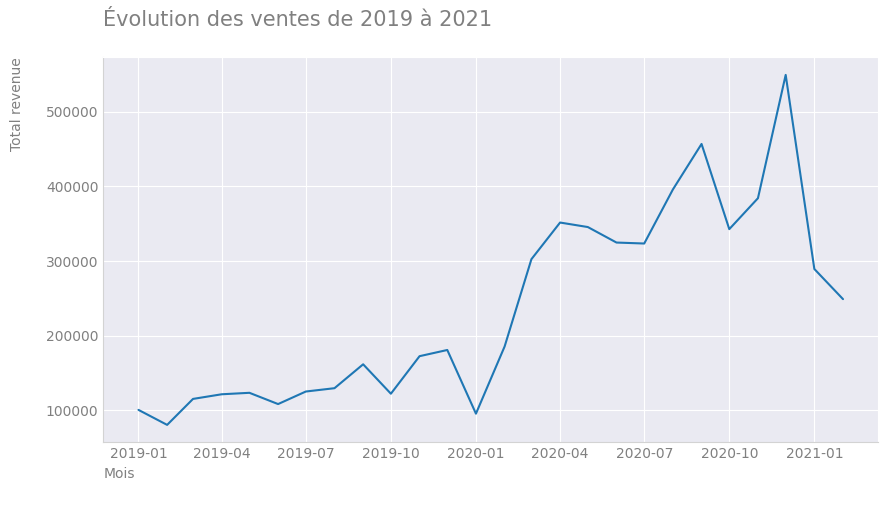

In [255]:
# Evolution des ventes totales

df_monthly = (
    df.groupby(df["PURCHASE_TS"].dt.to_period("M"))["USD_PRICE"].sum().reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

# Tracer les données
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
)

# Personnalisation des axes et du titre
plt.title("Évolution des ventes de 2019 à 2021\n", loc="left", color="grey", size=15)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Total revenue\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)
plt.show()

In [ ]:
# ----------------------------------------------------------
#
# 6. Deep Dive Analysis
#
# ----------------------------------------------------------

In [ ]:
# Le vente sont drivés par 3 articles :
#   27in 4K gaming monitor
#   Sony Playstation 5
#   Nintendo Switch

# A partir du 01/2020, proportionnellement, les ventes de PS5 explose, et les ventes de Switch se ralentisse

# L'app ne fait que 2.5% des ventes.

# Les réseaux sociaux représentent 1% des ventes

# L'analyse par région montre les mêmes évolutions quelques que soit la région.

# Les prix de vente sont stables.

# Sans surprise, par déduction, les quantités vendues suivent les mêmes fluctuations que les ventes

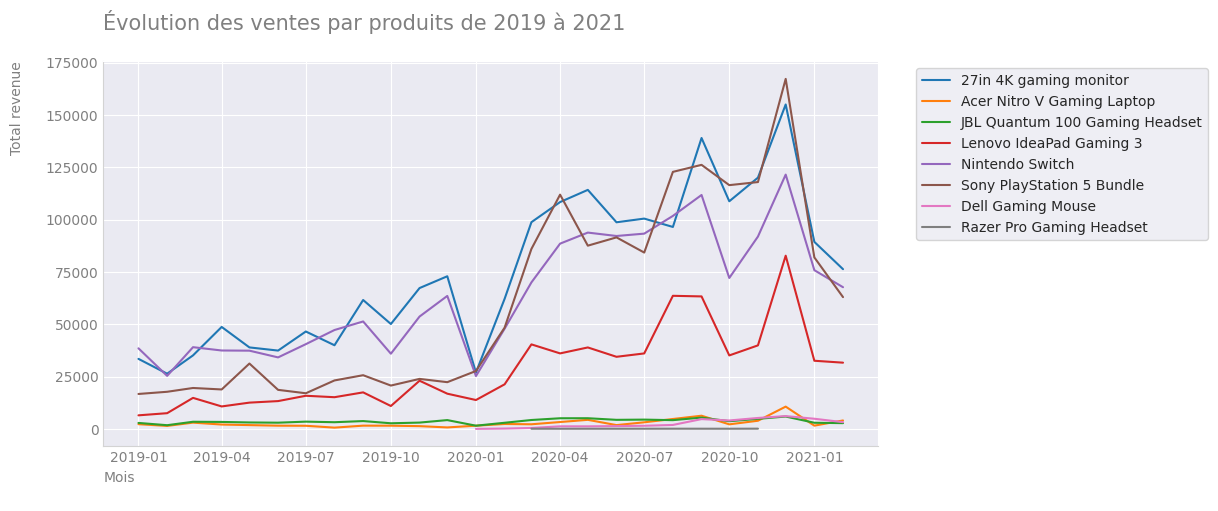

In [254]:
# Evolution des ventes par produits

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "PRODUCT_NAME"])["USD_PRICE"]
    .sum()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="PRODUCT_NAME",
)

# Personnalisation des axes et du titre
plt.title(
    "Évolution des ventes par produits de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Total revenue\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

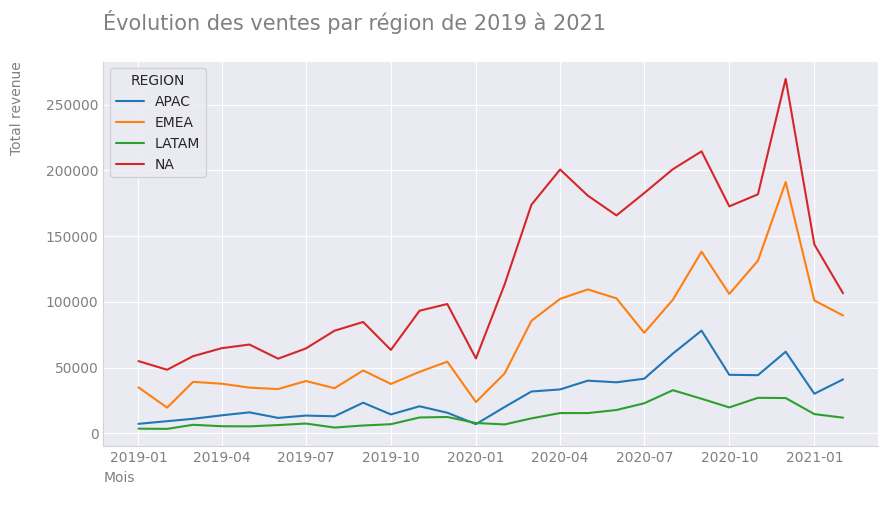

In [253]:
# Evolution des ventes par region

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "REGION"])["USD_PRICE"]
    .sum()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="REGION",
)

# Personnalisation des axes et du titre
plt.title(
    "Évolution des ventes par région de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Total revenue\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

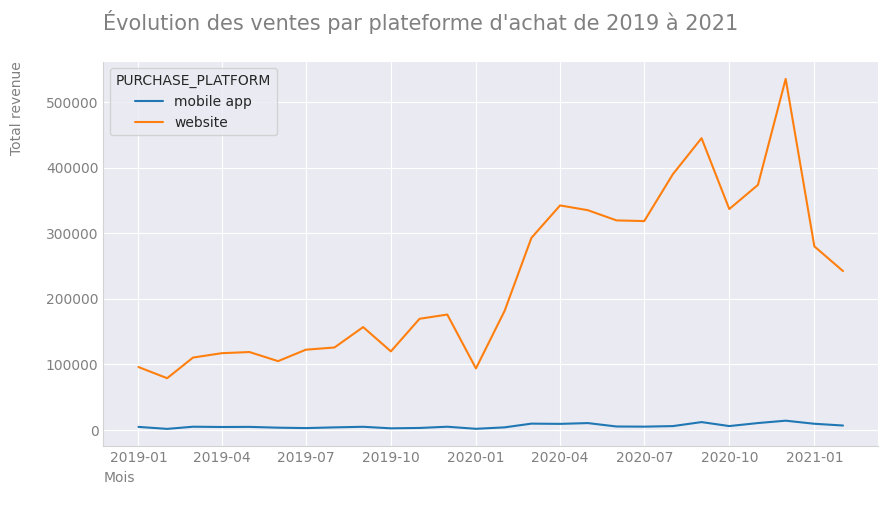

In [252]:
# Evolution des ventes par outils utilisés

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "PURCHASE_PLATFORM"])["USD_PRICE"]
    .sum()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="PURCHASE_PLATFORM",
)

# Personnalisation des axes et du titre
plt.title(
    "Évolution des ventes par plateforme d'achat de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Total revenue\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [248]:
q = """
SELECT
    PURCHASE_PLATFORM,
    SUM(USD_PRICE) AS total_sales,
    ROUND(SUM(USD_PRICE) / (SELECT SUM(USD_PRICE) FROM df) * 100,1) as ratio
FROM df
GROUP BY PURCHASE_PLATFORM
"""
duckdb.sql(q).df()

,PURCHASE_PLATFORM,total_sales,ratio
0,mobile app,153942.07,2.5
1,website,5982806.16,97.5


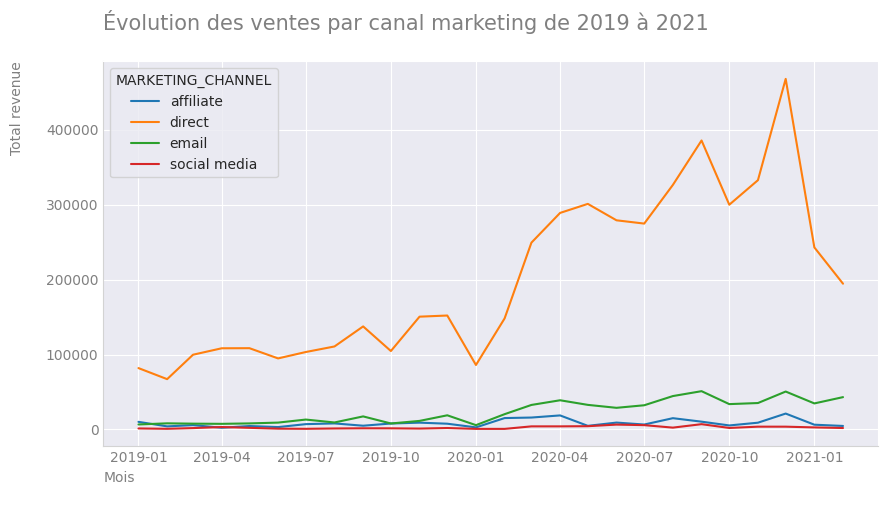

In [256]:
# Evolution des ventes par marketing channel

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "MARKETING_CHANNEL"])["USD_PRICE"]
    .sum()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="MARKETING_CHANNEL",
)

# Personnalisation des axes et du titre
plt.title(
    "Évolution des ventes par canal marketing de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Total revenue\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [249]:
q = """
SELECT
    MARKETING_CHANNEL,
    SUM(USD_PRICE) AS total_sales,
    round(SUM(USD_PRICE) / (SELECT SUM(USD_PRICE) FROM df) * 100,1) as ratio
FROM df
GROUP BY MARKETING_CHANNEL
"""
duckdb.sql(q).df()

,MARKETING_CHANNEL,total_sales,ratio
0,email,611182.72,10.0
1,direct,5196969.90,84.7
2,social media,69526.37,1.1
3,None,38270.43,0.6
4,affiliate,220798.81,3.6


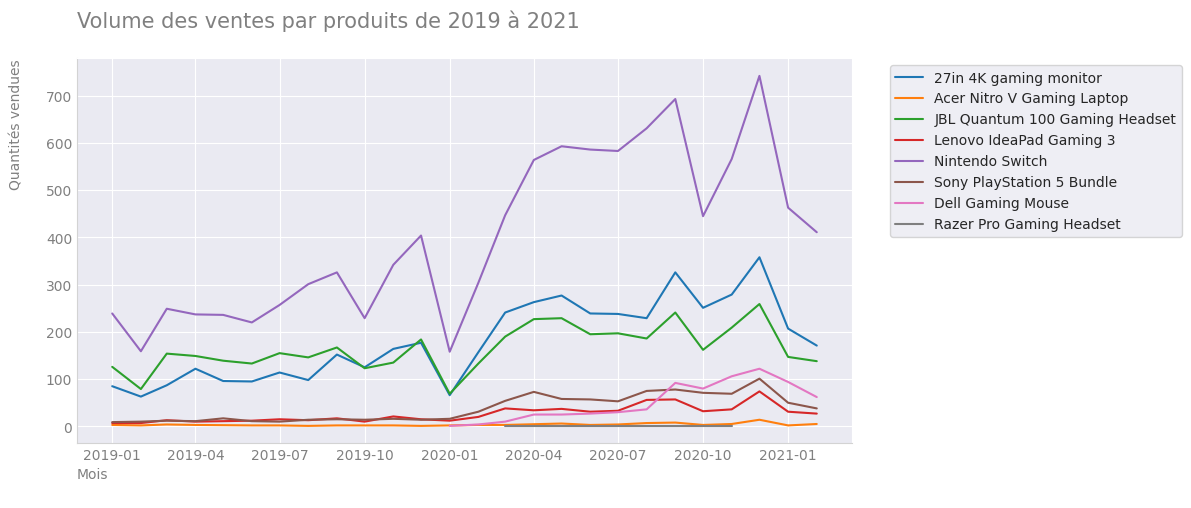

In [259]:
# On va s'interessé aux quantités vendues et à l'évolution des prix des articles

# Evolution des quantités vendues par articles

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "PRODUCT_NAME"])["USD_PRICE"]
    .count()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="PRODUCT_NAME",
)

# Personnalisation des axes et du titre
plt.title(
    "Volume des ventes par produits de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Quantités vendues\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

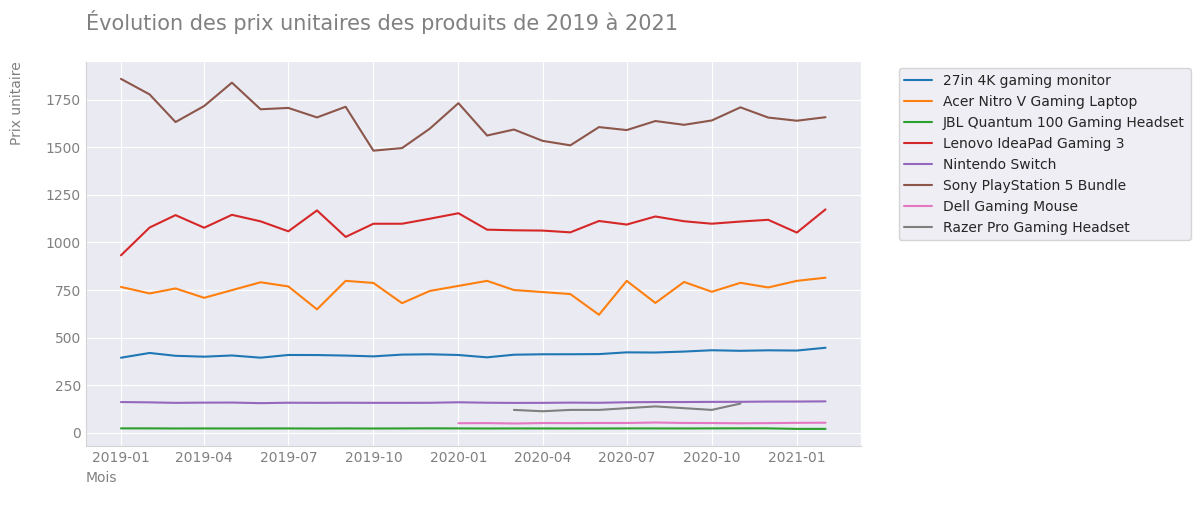

In [260]:
# Evolution des prix de vente des articles

df_monthly = (
    df.groupby([df["PURCHASE_TS"].dt.to_period("M"), "PRODUCT_NAME"])["USD_PRICE"]
    .mean()
    .reset_index()
)
df_monthly["PURCHASE_TS"] = df_monthly["PURCHASE_TS"].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    df_monthly,
    x="PURCHASE_TS",
    y="USD_PRICE",
    hue="PRODUCT_NAME",
)

# Personnalisation des axes et du titre
plt.title(
    "Évolution des prix unitaires des produits de 2019 à 2021\n",
    loc="left",
    color="grey",
    size=15,
)
plt.xlabel("Mois\n", loc="left", color="grey")
plt.ylabel("Prix unitaire\n", loc="top", color="grey")

plt.xticks(color="grey")
plt.yticks(color="grey")
# plt.grid(False)

# Mettre le cadre en gris en bas et à gauche, en blanc en haut et à droite
ax.spines["bottom"].set_edgecolor("lightgrey")
ax.spines["left"].set_edgecolor("lightgrey")
ax.spines["top"].set_edgecolor("white")
ax.spines["right"].set_edgecolor("white")

# Supprimer les petits traits des axes
ax.tick_params(axis="both", length=0)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()